# Introduction

Import the PARCELS particle trajectory output and plot them. Doing this outside of Deigo allows us to use Cartopy and more easily experiment with plotting.

In [ ]:
!pip install parcels
!pip install cgen
import parcels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import math
from datetime import datetime
from datetime import timedelta
from operator import attrgetter
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random
import cftime

!pip install "cmocean[plots]"
import cmocean
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature  

#Addition
import sys
import subprocess
import matplotlib.gridspec as gridspec


# Solution to colab crash when plotting. found here: https://github.com/SciTools/cartopy/issues/1490
!pip install --no-binary shapely shapely --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.4.tar.gz (199 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669439 sha256=dd3aea4b57ba0cbd9db5bf569ce44360268b7a515f4e19aea6bc66d24e399b1f
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b7062842aee4d4bb3566a1fc30ac7a4
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Manually plot

To do this you will have to download two output files from Deigo to Drive. 

1. The particle output file (e.g. 'insertname_particles.nc'
2. A tracerfile. This is a single OGCM file of the ocean parameters you would like to animate your particles over (e.g. 'GLBu0.08_expt_19.1nwp_surf_2012-01-01T00:00:00.000000000_UV.nc')

In [27]:
filename = '//content/drive/MyDrive/Earth_Systems_Course/PARCELS/Julian/Julian_particles.nc'
pfile = xr.open_dataset(str(filename), decode_cf=True)
lon = np.ma.filled(pfile.variables['lon'])
lat = np.ma.filled(pfile.variables['lat'])
time = np.ma.filled(pfile.variables['time'])

central_longitude=30

pfile.close()

plottimes = np.arange(time[0,0], np.nanmax(time), np.timedelta64(1, 'D'))
starttime = 0
b = time == plottimes[1+starttime]

In [28]:
pfile.variables['time']

<xarray.Variable (traj: 199, obs: 247)>
array([['2033-03-31T00:00:00.000000000', '2033-04-30T00:00:00.000000000',
        '2033-05-30T00:00:00.000000000', ..., '2053-04-15T00:00:00.000000000',
        '2053-05-15T00:00:00.000000000', '2053-06-14T00:00:00.000000000'],
       ['2033-03-31T00:00:00.000000000', '2033-04-30T00:00:00.000000000',
        '2033-05-30T00:00:00.000000000', ..., '2053-04-15T00:00:00.000000000',
        '2053-05-15T00:00:00.000000000', '2053-06-14T00:00:00.000000000'],
       ['2033-03-31T00:00:00.000000000', '2033-04-30T00:00:00.000000000',
        '2033-05-30T00:00:00.000000000', ..., '2053-04-15T00:00:00.000000000',
        '2053-05-15T00:00:00.000000000', '2053-06-14T00:00:00.000000000'],
       ...,
       ['2033-03-31T00:00:00.000000000', '2033-04-30T00:00:00.000000000',
        '2033-05-30T00:00:00.000000000', ..., '2053-04-15T00:00:00.000000000',
        '2053-05-15T00:00:00.000000000', '2053-06-14T00:00:00.000000000'],
       ['2033-03-31T00:00:00.000000000', '2033-04-30T00:00:00.000000000',
        '2033-05-30T00:00:00.000000000', ..., '2053-04-15T00:00:00.000000000',
        '2053-05-15T00:00:00.000000000', '2053-06-14T00:00:00.000000000'],
       ['2033-03-31T00:00:00.000000000', '2033-04-30T00:00:00.000000000',
        '2033-05-30T00:00:00.000000000', ..., '2053-04-15T00:00:00.000000000',
        '2053-05-15T00:00:00.000000000', '2053-06-14T00:00:00.000000000']],
      dtype='datetime64[ns]')
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

In [29]:
pfile['lon']

<xarray.DataArray 'lon' (traj: 199, obs: 247)>
array([[-178.99068, -178.92046, -178.95903, ..., -178.91559, -178.97226,
        -179.08601],
       [-168.29146, -168.29146, -168.29146, ..., -168.29146, -168.29146,
        -168.29146],
       [-176.40248, -176.40248, -176.40248, ..., -176.40248, -176.40248,
        -176.40248],
       ...,
       [ 158.605  ,  157.71855,  158.80516, ...,  158.73343,  157.85963,
         158.64491],
       [ 160.40019,  160.40019,  160.40019, ...,  160.07968,  160.07968,
         160.07968],
       [ 163.19801,  163.19801,  163.19801, ...,  163.19801,  163.19801,
         163.19801]], dtype=float32)
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  longitude
    units:          degrees_east
    axis:           X

In [ ]:
milo = -180
mila = -80
malo = 180
mala = 80

## Gerogii line plot

In [30]:
ptcls = pfile

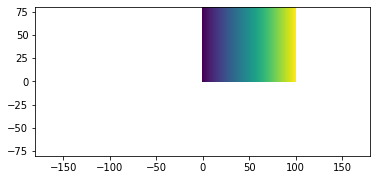

In [31]:
from matplotlib import pyplot as plt, animation
from IPython.display import HTML, display
x = ptcls['lon'][1]
y =  ptcls['lat'][1]

x2 = ptcls['lon'][2]
y2 =  ptcls['lat'][2]

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='r')
line2, = ax.plot(x2, y2, color='b')

def update(num, x, y, x2, y2, line, line2):
    line.set_data(x[:num], y[:num])
    line2.set_data(x2[:num], y2[:num])
    line.axes.axis([-180, 180, -80, 80])
    return line,



nx, ny = (100, 100)
x_m = np.linspace(-180, 180, nx)
y_m = np.linspace(-80, 80, ny)
xv, yv = np.meshgrid(x_m, y_m)

plt.imshow(xv)

ani = animation.FuncAnimation(fig, update, len(x), fargs=[ x, y, x2, y2, line, line2],
                       interval=25, blit=True)

plt.imshow(xv)


#ani.save('test.mp4')
HTML(ani.to_jshtml())

In [ ]:

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()
coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline',scale='50m',facecolor='none')
ax.add_feature(coastline, edgecolor='black')

#gs = gridspec.GridSpec(ncols=8, nrows=4, figure=fig)

line, = ax.plot(x, y, color='r')
line2, = ax.plot(x2, y2, color='b')

def update(num, x, y, x2, y2, line, line2):
    line.set_data(x[:num], y[:num])
    line2.set_data(x2[:num], y2[:num])
    line.axes.axis([-180, 180, -80, 80])
    return line,



nx, ny = (100, 100)
x_m = np.linspace(-180, 180, nx)
y_m = np.linspace(-80, 80, ny)
xv, yv = np.meshgrid(x_m, y_m)

ax.set_extent([milo, malo, mila, mala], crs=ccrs.PlateCarree())


ani = animation.FuncAnimation(fig, update, len(x), fargs=[ x, y, x2, y2, line, line2],
                       interval=25, blit=True)

plt.imshow(xv)
HTML(ani.to_jshtml())

AttributeError: ignored

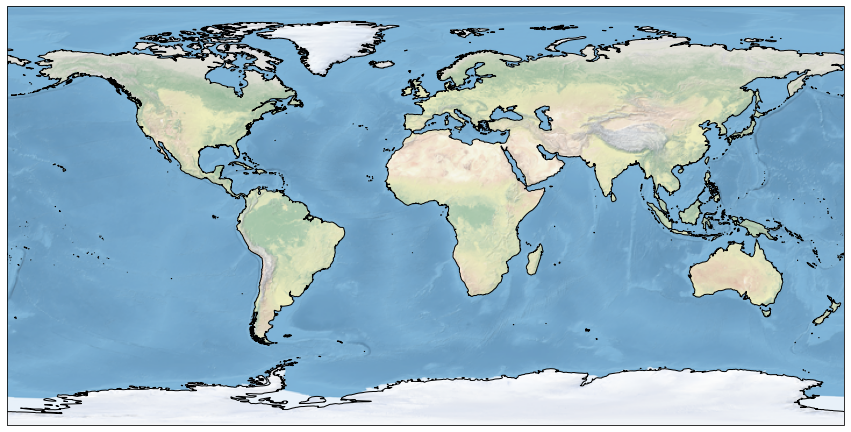

In [ ]:


fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()
coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline',scale='50m',facecolor='none')
ax.add_feature(coastline, edgecolor='black')

x = ptcls['lon']
y =  ptcls['lat']


lines = [plt.plot([], [])[0] for _ in range(100)]

def animate(i):
    for j in range(96):
        lines[j].set_data(x[j][0:i], y[j][0:i])
        lines[j].axes.axis([120, 150, 15, 45])

    return lines

anim = animation.FuncAnimation(fig, animate, 
           frames=96, interval=96, blit=True)


#anim.save('Georgii_test.mp4', dpi = 300)
#plt.show()

HTML(anim.to_jshtml())